# **Convolutional Neural Networks (CNNs)**

CNNs are static neural networks - no recurrent connections are present.

CNN stands for Convolutional Neural Network, and what that means is that it is a neural network with convolutional layers.

# **Convolution**

To understand CNNs, we need to firstly understand convolution.

In deep learning, we normally use convolution on images, which are two dimensional objects.

A typical example is edge detection.

In the example below: in the left you have the original image and on the right you have an image that looks like the one on the left. In its turn, the right image is white-colored in positions corresponding to the edges of the original image, and it is black where there were no edges.

Then, in convolution there is some kind of edge detection filter or any other kind of filter being applied, and we slide this filter over every part of the input image.



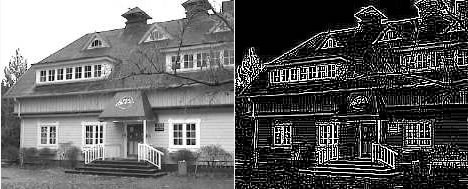



At each point where we slide the filter, we multiply the filter by the image pixels element, and we send them all together to produce the result (just multiplying element-wise and adding).

So basically, if you can add and you can multiply, then you can do convolution.

One common question is **how do we know what values we should put in the filter in order to get an edge detector**?

Of course, this is machine learning, so we never want to choose these parameters manually. **Machine learning means that the machine is supposed to learn these parameters**.

In deep learning, **that is done by backpropagation** Therefore, as long as we can set up a loss function at the end of this neural network and we can backpropagate the error, the filter parameters will automatically be found during training.

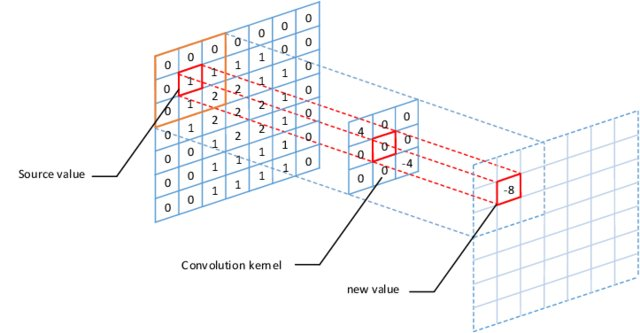

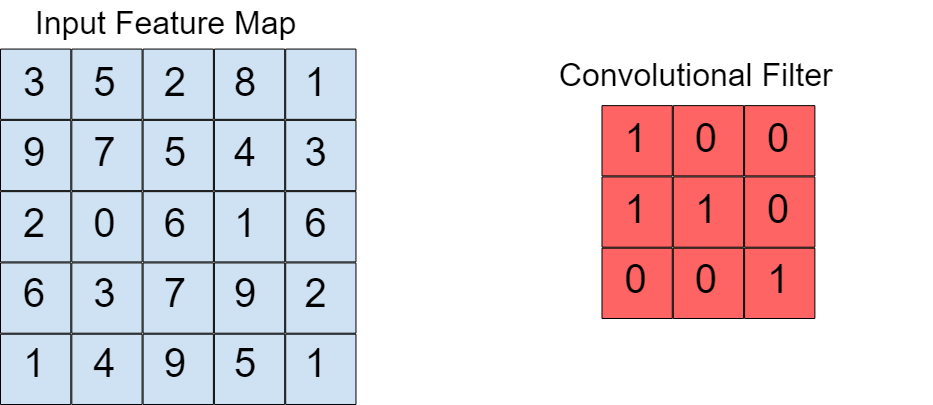

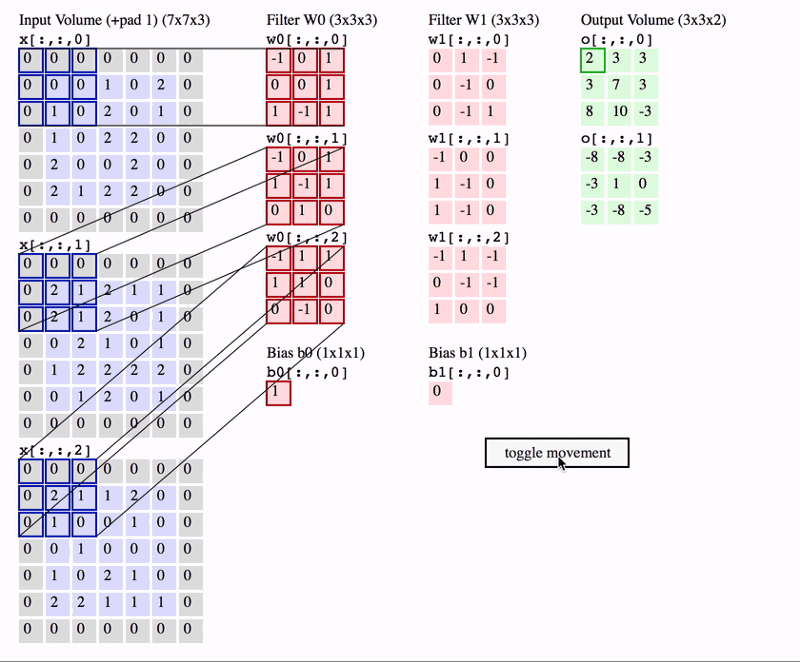

Image above as an animated gif:

https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/

# **1-D Convolution**

Now, when we are talking about things like audio and text, we actually have a similar situation. **The difference is that audio and text are both one-dimensional objects, because time is the only independent variable**.

The one-dimensional convolution is actually a lot simpler to visualize: **it is just a signal going in one direction, with a filter which slides along that signal in that one direction**.


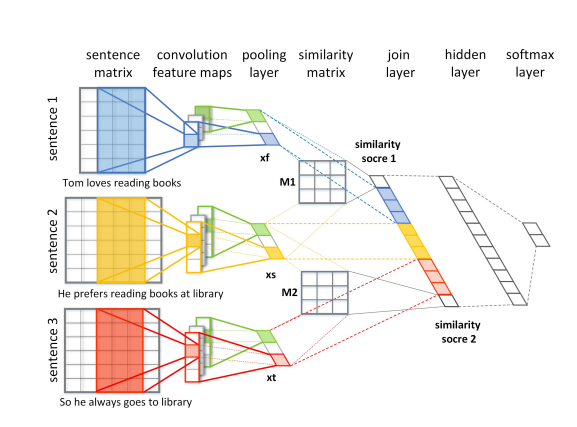

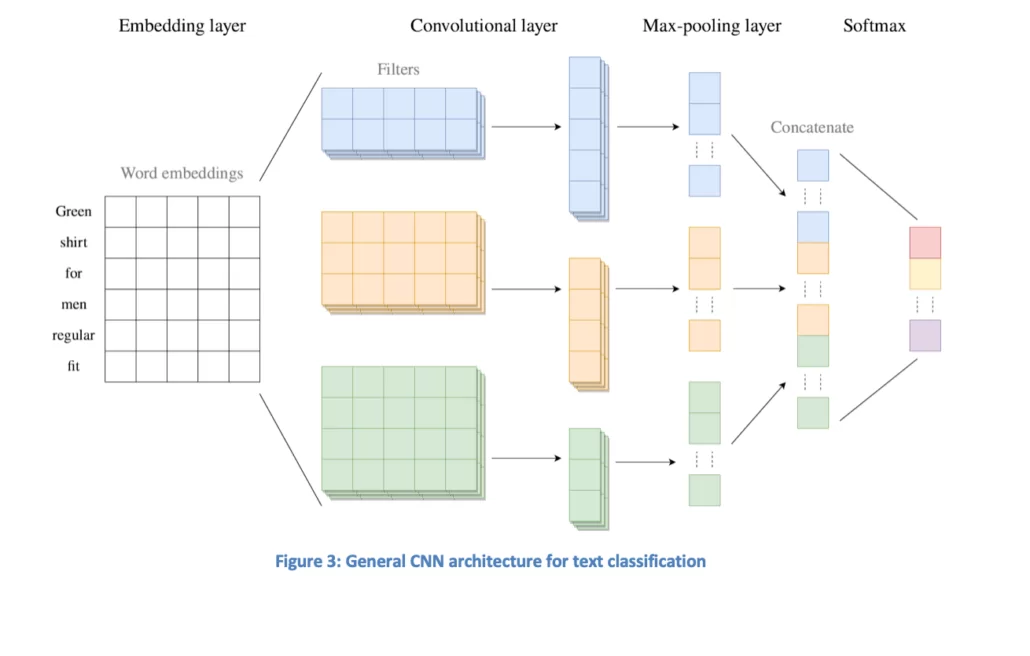

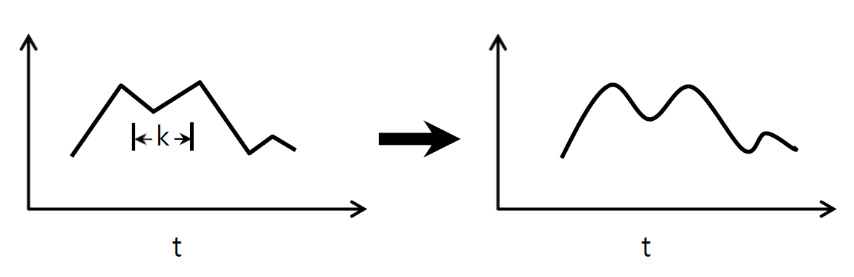

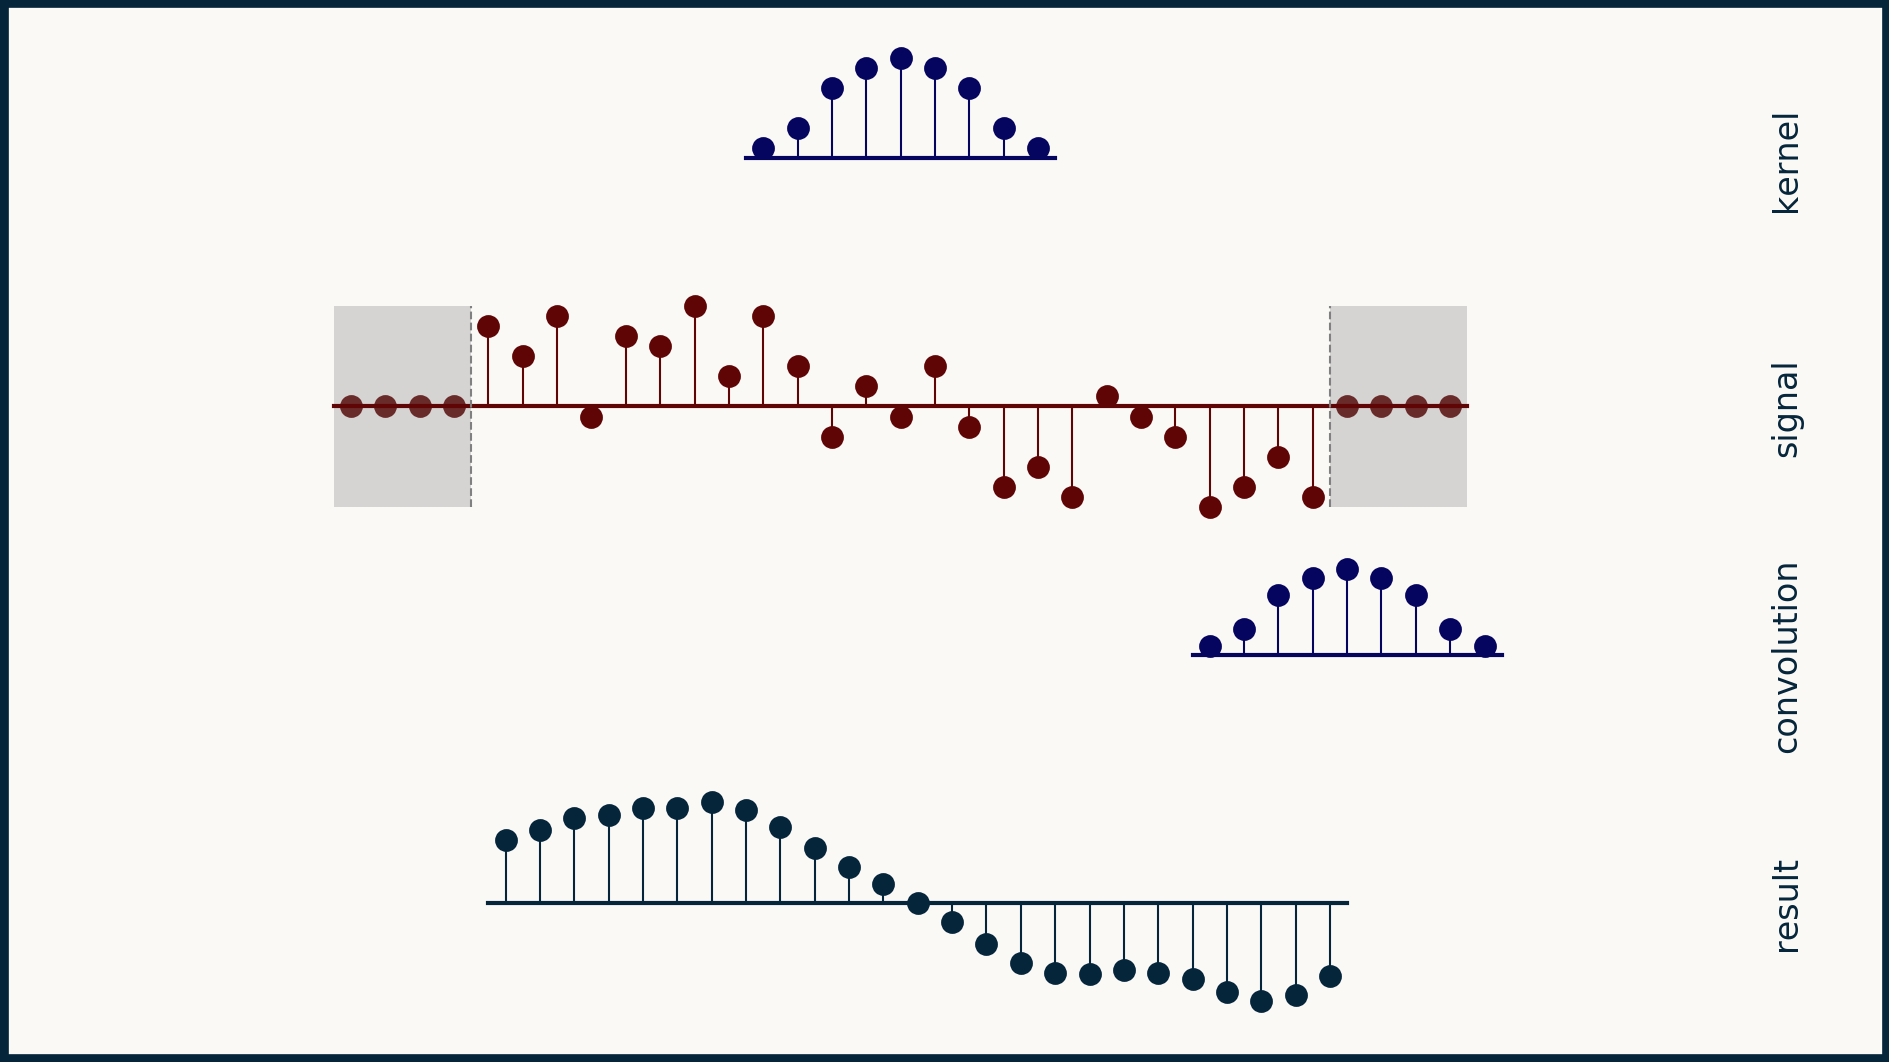

What we call convolution in deep learning is actually not real convolution, as it's known in the rest of the engineering world.

The operation we do in deep learning is actually called cross-correlation. **The only difference between true convolution and cross-correlation is that the filter is reversed for convolution**.

```
Convolution: (f*g)[n] = Σf[m]g[n - m]
Cross-correlation: (f⭐g)[n] = Σf[m]g[n + m]
```
Otherwise, these operations are exactly the same: just multiply and add.

### **So let's say I have two signals, one is my input signal, and one is my filter, what happens if I perform convolution or in other words, cross-correlation between this input signal and this filter?**

**The filter just acts as a pattern finder**: it outputs a small number where the filter does not match the input; **and it outputs a big number where the filter does match the input**.

The job of the filter is just **to find the parts of the signal that look like themselves**, so it outputs a large number when that happens.

For a one-dimensional convolution, we will therefore see a spike (large signal) **where there is a match between the shape of the signal and the shape of the filter (where high values occurs by both simultaneously)**.

So that is what cross-correlation does, and that is what we call convolution in deep learning.

## **So why do we want to use CNNs for NLP if they are usually used on images?**

CNNs are totally applicable to NLP: **convolution is a very general operation**.

- They can be used for edge detection and application of other image filters (2-D convolution in image processing);
- They can also be used for adding echo, reverb, and other audio effects to sound (1-D convolution in audio signals).
- The two dimensions in an image are height and width, whereas the one dimension in an audio signal is time.

## **1-D Convolution: applicable to time-varying signals**

- One obvious application of 1-D convolution is in speech recognition.
- That is because speech is recorded as an audio signal.
- When speaking into the microphone, a sound file that contains a given waveform is generated (audio signal).
- One of the most famous applications of NLP, which is speech recognition (automatic text transcription), involves taking this sound signal as input and producing the words that are being said as output text.


Another application: **treating a sequence of word vectors as a 1-D (vector) signal**.
- Recall that the first step of any neural network that takes in a sequence of words is input is **to create an embedding of those words**. 
- In other words, given a sequence of words, we are going to turn that into a sequence of word vectors, **what basically creates a one dimensional signal**.

An important consideration: audio is a **scalar signal** where, for each point in time, you only have one value (of signal).

For word embeddings, we get a **vector signal** where for each point in time you have multiple values.
```
"The quick brown fox" ⟶ [Vec("the"), Vec("quick"), Vec("brown"), Vec("fox")]
```

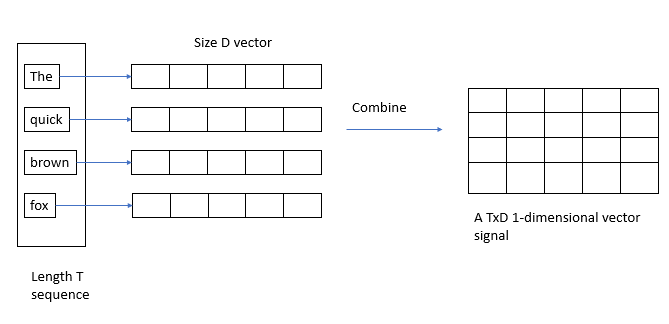

The image above shows the structure of the data:
- We have a sequence of words (sequence of length T);
- Then, we convert each word into a vector by grabbing it **from some pre-trained word embedding**; 
- Each of these vectors is of size D. Now we have T objects, each of them with size D.
- We can also view those objects as a T x D matrix, with we just stack them all together.

Importantly: this is not the same as a height by width 2D-image: 
- With 2D-convolution, we were going to do convolution along the height dimension and along the width dimension. 
- With **1D-convolution, we are only doing convolution along the time dimension** (so we are only going "down").

# **Architecture**

The architecture of the model will be like the image below:

- Firstly, we convert our input sentence into a sequence of word embeddings.
- Thenn, we do a 1-D convolution on that one dimensional vector signal.
- Nextly, we follow the usual pattern of a CNN: convolution followed by pooling, followed by another convolution, followed by another pooling, and so on (we do that a few times).
- Finally, we pass it through a couple of **dense layers (fully connected layers, as in regular neural networks)** to get the output prediction.

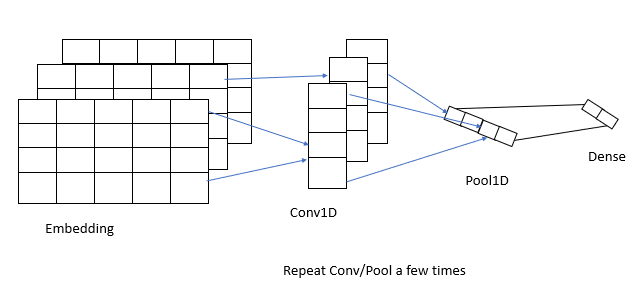

CNNs are indeed powerful models for an LP, but they are also simpler than RNNs (recursive neural networks).

https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/

Convolutional Neural Networks have a different architecture than regular Neural Networks. **Regular Neural Networks transform an input by putting it through a series of hidden layers**. Every layer is made up of a set of neurons, where **each layer is fully connected to all neurons in the layer before**. 

Finally, there is a **last fully-connected layer — the output layer — that represent the predictions**.

**Convolutional Neural Networks** are a bit different. First of all, the layers are organised in 3 dimensions: width, height and depth. Further, the **neurons in one layer do not connect to all the neurons in the next layer** but only to a small region of it. 

Lastly, the **final output will be reduced to a single vector of probability scores, organized along the depth dimension**.

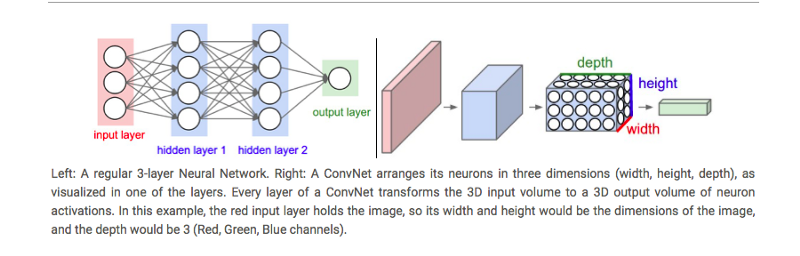

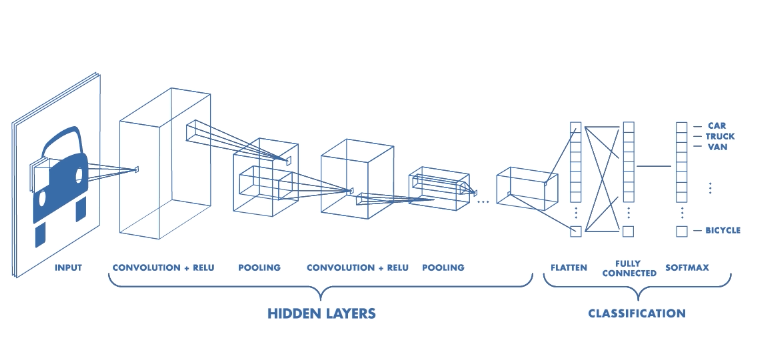

CNNs have two components:

**The Hidden layers/Feature extraction part**
In this part, the network will perform a series of convolutions and pooling operations during which the features are detected. If you had a picture of a zebra, this is the part where the network would recognise its stripes, two ears, and four legs.

**The Classification part**
Here, the fully connected layers will serve as a classifier on top of these extracted features. They will assign a probability for the object on the image being what the algorithm predicts it is.

In [ ]:
# before we start building we import the libraries
import numpy as np
from keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense
from keras.models import Sequential

# **Feature extraction**

Convolution is one of the main building blocks of a CNN. The term c**onvolution refers to the mathematical combination of two functions to produce a third function. It merges two sets of information**.

In the case of a CNN, the convolution is performed on the input data with the use of a **filter or kernel (these terms are used interchangeably)** to then produce a **feature map**.

We execute a convolution by sliding the filter over the input. **At every location, a matrix multiplication is performed and sums the result onto the feature map**.

In the animation in https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/, you can see the convolution operation. You can see the filter (the green square) is sliding over our input (the blue square) and the sum of the convolution goes into the feature map (the red square).

**The area of our filter is also called the receptive field**, named after the neuron cells! The size of this filter is 3x3.

For the sake of explaining, I have shown you the operation in 2D, but in reality convolutions are performed in 3D. Each image is namely represented as a 3D matrix with a dimension for width, height, and depth. **Depth is a dimension because of the colours channels used in an image (RGB)**.

We perfom numerous convolutions on our input, where each operation uses a different filter. This results in different feature maps. **In the end, we take all of these feature maps and put them together as the final output of the convolution layer**.

**Just like any other Neural Network, we use an activation function to make our output non-linear**. In the case of a Convolutional Neural Network, the output of the convolution will be passed through the activation function. This could be the ReLU activation function.

**Stride is the size of the step the convolution filter moves each time.** A stride size **is usually 1**, meaning the filter slides pixel by pixel. By increasing the stride size, your filter is sliding over the input with a larger interval and thus has less overlap between the cells.

**Because the size of the feature map is always smaller than the input, we have to do something to prevent our feature map from shrinking. This is where we use padding**.

**A layer of zero-value pixels is added to surround the input with zeros, so that our feature map will not shrink.** In addition to keeping the spatial size constant after performing convolution, padding also improves performance and makes sure the kernel and stride size will fit in the input.

After a convolution layer, it is common to add a pooling layer in between CNN layers. **The function of pooling is to continuously reduce the dimensionality to reduce the number of parameters and computation in the network.** This shortens the training time and **controls overfitting**.

**The most frequent type of pooling is max pooling, which takes the maximum value in each window**. These window sizes need to be specified beforehand. This decreases the feature map size while at the same time keeping the significant information.

Thus when using a CNN, the four important hyperparameters we have to decide on are:

- the kernel size
- the filter count (that is, how many filters do we want to use)
- stride (how big are the steps of the filter)
- padding

In [ ]:
# Images fed into this model are 512 x 512 pixels with 3 channels
img_shape = (28,28,1)
# Set up the model
model = Sequential()
# Add convolutional layer with 3, 3 by 3 filters and a stride size of 1# Set padding so that input size equals output size
model.add(Conv2D(6,2,input_shape=img_shape))
# Add relu activation to the layer 
model.add(Activation('relu'))
#Pooling
model.add(MaxPool2D(2))

# **Classification**

After the convolution and pooling layers, our classification part consists of a few fully connected layers. However, these fully connected layers can only accept 1 Dimensional data. T**o convert our 3D data to 1D, we use the function flatten in Python. This essentially arranges our 3D volume into a 1D vector**.

The last layers of a Convolutional NN are **fully connected layers (dense).** Neurons in a fully connected layer have full connections to all the activations in the previous layer. **This part is in principle the same as a regular Neural Network**.

In [ ]:
#Fully connected layers
# Use Flatten to convert 3D data to 1Dmodel.add(Flatten())
# Add dense layer with 10 neuronsmodel.add(Dense(10))
# we use the softmax activation function for our last layermodel.add(Activation('softmax'))
# give an overview of our model
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary

_________________________________________________________________Layer (type)                 Output Shape              Param #   =================================================================conv2d_1 (Conv2D)            (None, 27, 27, 6)         30        _________________________________________________________________activation_1 (Activation)    (None, 27, 27, 6)         0         _________________________________________________________________max_pooling2d_1 (MaxPooling2 (None, 13, 13, 6)         0         _________________________________________________________________flatten_1 (Flatten)          (None, 1014)              0         _________________________________________________________________dense_1 (Dense)              (None, 10)                10150     _________________________________________________________________activation_2 (Activation)    (None, 10)                0         =================================================================Total params: 10,180Trainable params: 10,180Non-trainable params: 0__________________________________________________________________

# **Training**

Training a CNN works in the same way as a regular neural network, **using backpropagration or gradient descent.** However, here this is a bit more mathematically complex because of the convolution operations.

In [ ]:
"""Before the training process, we have to put together a learning process in a particular form. It consists of 3 elements: an optimiser, a loss function and a metric."""
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])
# dataset with handwritten digits to train the model onfrom keras.datasets import mnist
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
# Train the model, iterating on the data in batches of 32 samples# for 10 epochs
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test)
# Training...

In [ ]:
x_train.shape

In [ ]:
y_train.shape

Train on 60000 samples, validate on 10000 samplesEpoch 1/1060000/60000 [==============================] - 10s 175us/step - loss: 4.0330 - acc: 0.7424 - val_loss: 3.5352 - val_acc: 0.7746Epoch 2/1060000/60000 [==============================] - 10s 169us/step - loss: 3.5208 - acc: 0.7746 - val_loss: 3.4403 - val_acc: 0.7794Epoch 3/1060000/60000 [==============================] - 11s 176us/step - loss: 2.4443 - acc: 0.8372 - val_loss: 1.9846 - val_acc: 0.8645Epoch 4/1060000/60000 [==============================] - 10s 173us/step - loss: 1.8943 - acc: 0.8691 - val_loss: 1.8478 - val_acc: 0.8713Epoch 5/1060000/60000 [==============================] - 10s 174us/step - loss: 1.7726 - acc: 0.8735 - val_loss: 1.7595 - val_acc: 0.8718Epoch 6/1060000/60000 [==============================] - 10s 174us/step - loss: 1.6943 - acc: 0.8765 - val_loss: 1.7150 - val_acc: 0.8745Epoch 7/1060000/60000 [==============================] - 10s 173us/step - loss: 1.6765 - acc: 0.8777 - val_loss: 1.7268 - val_acc: 0.8688Epoch 8/1060000/60000 [==============================] - 10s 173us/step - loss: 1.6676 - acc: 0.8799 - val_loss: 1.7110 - val_acc: 0.8749Epoch 9/1060000/60000 [==============================] - 10s 172us/step - loss: 1.4759 - acc: 0.8888 - val_loss: 0.1346 - val_acc: 0.9597Epoch 10/1060000/60000 [==============================] - 11s 177us/step - loss: 0.1026 - acc: 0.9681 - val_loss: 0.1144 - val_acc: 0.9693

# **Summary**

In summary, CNNs are especially useful for image classification and recognition. They have two main parts: **a feature extraction part and a classification part**.

The main special technique in CNNs is convolution, where a **filter slides over the input and merges the input value + the filter value on the feature map.** In the end, our goal is to feed new images to our CNN so it can give a probability for the object it thinks it sees or describe an image with text.